# PCA

In [2]:
import torch
import requests
import matplotlib.pyplot as plt

/home/sehyeon/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 데이터 불러오기

In [3]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)
open('iris.data', 'wb').write(r.content)

vectors = []
answers = []
with open('iris.data', 'r') as f:
    for line in f:
        line = line.strip()
        if len(line) != 0:
            items = line.split(",")
            vectors.append([float(x) for x in items[:4]])
            answers.append(items[4])

print(vectors)
print(answers)

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0

In [4]:
species = {a:i for i, a in enumerate(set(answers))}
species

{'Iris-versicolor': 0, 'Iris-virginica': 1, 'Iris-setosa': 2}

## Tensor로 변환하고 중심 옮기기

In [5]:
X = torch.FloatTensor(vectors)
Z = (X-torch.mean(X, axis=0))
Z

tensor([[-7.4333e-01,  4.4600e-01, -2.3587e+00, -9.9867e-01],
        [-9.4333e-01, -5.4000e-02, -2.3587e+00, -9.9867e-01],
        [-1.1433e+00,  1.4600e-01, -2.4587e+00, -9.9867e-01],
        [-1.2433e+00,  4.6000e-02, -2.2587e+00, -9.9867e-01],
        [-8.4333e-01,  5.4600e-01, -2.3587e+00, -9.9867e-01],
        [-4.4333e-01,  8.4600e-01, -2.0587e+00, -7.9867e-01],
        [-1.2433e+00,  3.4600e-01, -2.3587e+00, -8.9867e-01],
        [-8.4333e-01,  3.4600e-01, -2.2587e+00, -9.9867e-01],
        [-1.4433e+00, -1.5400e-01, -2.3587e+00, -9.9867e-01],
        [-9.4333e-01,  4.6000e-02, -2.2587e+00, -1.0987e+00],
        [-4.4333e-01,  6.4600e-01, -2.2587e+00, -9.9867e-01],
        [-1.0433e+00,  3.4600e-01, -2.1587e+00, -9.9867e-01],
        [-1.0433e+00, -5.4000e-02, -2.3587e+00, -1.0987e+00],
        [-1.5433e+00, -5.4000e-02, -2.6587e+00, -1.0987e+00],
        [-4.3333e-02,  9.4600e-01, -2.5587e+00, -9.9867e-01],
        [-1.4333e-01,  1.3460e+00, -2.2587e+00, -7.9867e-01],
        

## 주성분 찾기 함수
분산을 최대로 하는 w 벡터 찾기

In [6]:
def findPC(Z):
    w = torch.randn(Z.shape[1])
    w = w/(torch.dot(w,w)**0.5)

    lr = 0.1

    for epoch in range(1001):
        w.requires_grad_(True)
        variance = torch.mean(torch.sum(Z * w, dim=1) ** 2)

        variance.backward()
        with torch.no_grad():
            w = w + lr * w.grad
            w = w/(torch.dot(w, w) ** 0.5)

    return w, variance.item()

## 순서대로 주성분 찾기

In [7]:
def PCA(Z, n):
    W, V = [], []

    for _ in range(n):
        w, v = findPC(Z)
        W.append(w)
        V.append(v)
        Z = Z - (Z @ w.view(-1, 1)) * w

    return W, V

## 각 축이 주성분이 되도록 기존 데이터를 변경

In [8]:
def transform(Z, W):
    return Z @ torch.stack(W).T

## PCA 구해보기
PCA를 구하고 데이터 변환

In [9]:
W, V = PCA(Z, 4)
K = transform(Z, W)

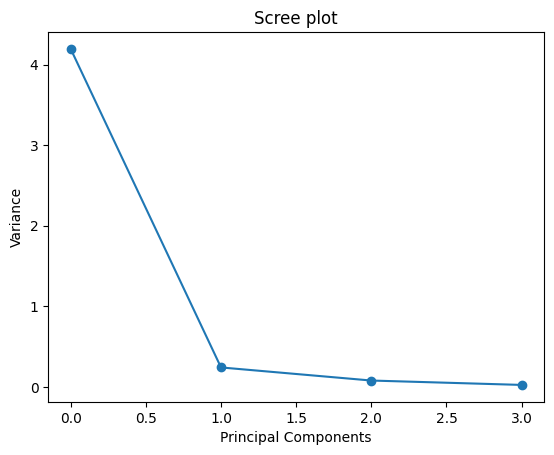

In [10]:
plt.title("Scree plot")
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.plot(range(4), V, "o-")
plt.show()

## PC1과 PC2를 축으로 하는 그래프 그리기

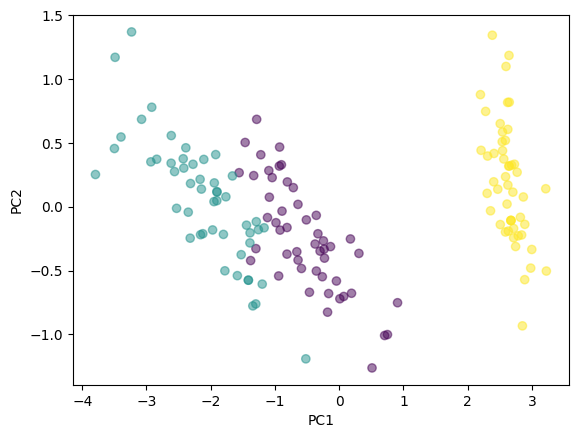

In [11]:
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(K[:,0], K[:,1], c = [species[a] for a in answers], alpha = 0.5)
plt.show()